In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

%load_ext line_profiler


#Find the releative path of Lib folder
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import PyDFN3D as dfnpy

work_dir=%pwd
print('Current Workdir=',work_dir)

Current Workdir= F:\PyDFN3D\Examples


In [67]:
Case1=dfnpy.DFN_Model()
Case1.loadDFN('..\Datas\DFN_400fracs.dat')
#Case1.loadDFN('..\Datas\DFN_50fracs.dat')

[Input] Reading "..\Datas\DFN_400fracs.dat" DFN file....
Dimension= 3
Number of Points= 1099
Number of Fractures= 98
Number of Intersections= 329
Number of Wells= 2
Fracture 0 has Intersections of  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Fracture 20 has Intersections of  [10, 225, 226, 227]
Fracture 40 has Intersections of  [20, 166, 281, 282, 283, 284, 285, 286, 287]
Fracture 60 has Intersections of  [227]
Fracture 80 has Intersections of  [45, 46, 274, 275, 317]
Fracture 97 has Intersections of  [49, 50, 150, 151, 202]


In [68]:
h_mesh_frac=100.0/8.0
Case1.setFlowSolver(solver='BEM',h_frac=h_mesh_frac,h_trace=h_mesh_frac/2)

------------Setting up Fracture 1------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:314(Total) 70(Edge) 243(Trace)
[Mesh] Number of Nodes:940(Total) 210(Edge) 729(Trace) 1(Source)
------------Setting up Fracture 2------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:307(Total) 67(Edge) 239(Trace)
[Mesh] Number of Nodes:919(Total) 201(Edge) 717(Trace) 1(Source)
------------Setting up Fracture 3------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:259(Total) 64(Edge) 193(Trace)
[Mesh] Number of Nodes:773(Total) 192(Edge) 579(Trace) 2(Source)
------------Setting up Fracture 4------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:286(Total) 67(Edge) 218(Trace)
[Mesh] Number of Nodes:856(Total) 201(Edge) 654(Trace) 1(Source)
------------Setting up Fracture 5------------
[Mesh] Genetrated...
[Mesh] Di

[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:21(Total) 14(Edge) 7(Trace)
[Mesh] Number of Nodes:63(Total) 42(Edge) 21(Trace) 0(Source)
------------Setting up Fracture 81------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:24(Total) 15(Edge) 9(Trace)
[Mesh] Number of Nodes:72(Total) 45(Edge) 27(Trace) 0(Source)
------------Setting up Fracture 82------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:14(Total) 12(Edge) 2(Trace)
[Mesh] Number of Nodes:42(Total) 36(Edge) 6(Trace) 0(Source)
------------Setting up Fracture 83------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:17(Total) 16(Edge) 1(Trace)
[Mesh] Number of Nodes:51(Total) 48(Edge) 3(Trace) 0(Source)
------------Setting up Fracture 84------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:25(Total)


------------ Fracture 0------------


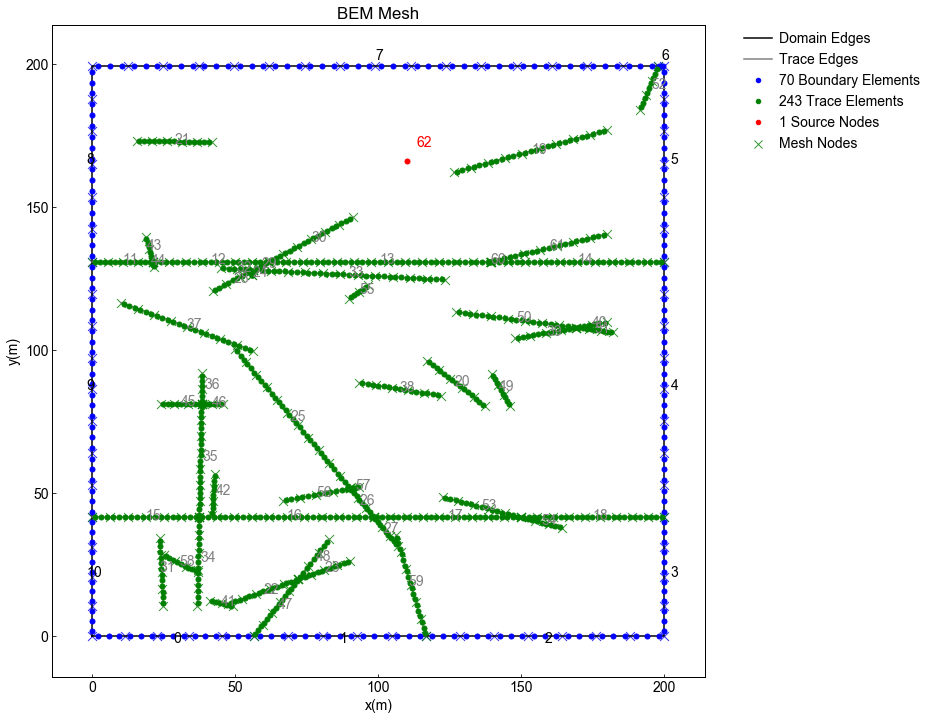

In [69]:
i=0
print('\n------------ Fracture %d------------'%(i))
Case1.FlowSolver.showMesh(i,scale=3.0)

## Set up boundary conditions

In [70]:
#2. Set up boundary condition automatically
def getBCTable(FracBDIDs,BCtype,BCvalue):
    Tables=[]
    for fracBDID in FracBDIDs:
        fracID=fracBDID[0]
        IntIDs=fracBDID[1]
        for idx in IntIDs:
            Tables.append((fracID,idx,BCtype,BCvalue))
    return Tables

#Well1
FracBDIDs=Case1.FracNets.GetWellsIntersectTable(0)
BCtype='Dirichlet'
BCvalue=15e6
#Format (fracID,BdID,BCtype,BCvalue)
Inlets=getBCTable(FracBDIDs,BCtype,BCvalue)

#Well2, Well3
FracBDIDs=Case1.FracNets.GetWellsIntersectTable(1)
BCtype='Dirichlet'
BCvalue=10e6
#Format (fracID,BdID,BCtype,BCvalue)
Outlets=getBCTable(FracBDIDs,BCtype,BCvalue)

In [71]:
for BC in Inlets+Outlets:
    fracID,BDID,BC_type,BC_val=BC
    print('-------Frac',fracID,'--------')
    if(BC_type=='Dirichlet'):
        Case1.setBoundaryConditions(fracID=fracID,DirichletBC=[(BDID,BC_val)])
    if(BC_type=='Neumann'):
        Case1.setBoundaryConditions(fracID=fracID,NeumannBC=[(BDID,BC_val)])

-------Frac 1 --------
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(74, 15000000.0)]
-------Frac 2 --------
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(61, 15000000.0)]
-------Frac 3 --------
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(55, 15000000.0)]
-------Frac 8 --------
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(14, 15000000.0)]
-------Frac 30 --------
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(19, 15000000.0)]
-------Frac 47 --------
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(8, 15000000.0)]
-------Frac 58 --------
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(13, 15000000.0)]
-------Frac 75 --------
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(16, 15000000.0)]
-------Frac 0 --------
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(62, 10000000.0)]
-------

## Set up frac props and solve

In [33]:
import numpy as np
import matplotlib.pyplot as plt

#Ref1:https://doi.org/10.1007/s12182-016-0132-3
#Ref2:https://doi.org/10.1016/0148-9062(70)90025-2
def getLogNormFracAperature(NumFracs,mu, sigma):
    mm=1e-3 #meter
    d = np.random.lognormal(mu, sigma, NumFracs)
    return d*mm

#Log normal fracture aperature distribution and cubic law permeability calculation
mu, sigma = -2.1, 0.27 # mean and standard deviation from  Ref2
mu, sigma = -1.7, 0.27 # mean and standard deviation from  Ref2

d_frac=getLogNormFracAperature(Case1.FracNets.NumFracs,mu, sigma)
#d_frac=getLogNormFracAperature(1000,mu, sigma)
print('Frac Aperature Mean Min Max',np.mean(d_frac/1e-3),np.min(d_frac/1e-3),np.max(d_frac/1e-3),'mm')

d_frac[0:4]=0.3*1e-3;
#Cubic law fracture permeability
k_frac=d_frac**2/12
print('Frac Permeability Mean Min Max',np.mean(k_frac),np.min(k_frac),np.max(k_frac),'m^2')

np.save('ComplexDFN_frac.npy',k_frac)
np.save('ComplexDFN_d.npy',d_frac)

Frac Aperature Mean Min Max 0.19820192803822523 0.08932304810413014 0.35378434725031715 mm
Frac Permeability Mean Min Max 3.6686989499127e-09 6.648839102177289e-10 1.043028036327775e-08 m^2


Frac Aperature Mean Min Max 0.2014081011498013 0.08932304810413014 0.35378434725031715 mm
Frac Permeability Mean Min Max 3.6686989499127e-09 6.648839102177289e-10 1.043028036327775e-08 m^2


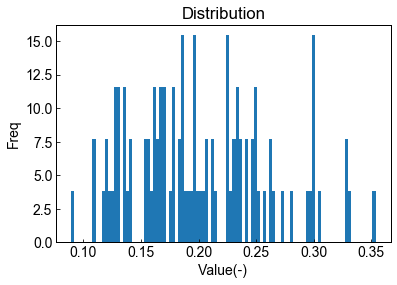

In [72]:
k_frac=np.load('ComplexDFN_frac.npy')
d_frac=np.load('ComplexDFN_d.npy')
print('Frac Aperature Mean Min Max',np.mean(d_frac/1e-3),np.min(d_frac/1e-3),np.max(d_frac/1e-3),'mm')
print('Frac Permeability Mean Min Max',np.mean(k_frac),np.min(k_frac),np.max(k_frac),'m^2')


count, bins, ignored = plt.hist(d_frac/1e-3, 100, density=True, align='mid')
plt.title('Distribution')
plt.xlabel('Value(-)')
plt.ylabel('Freq')
plt.show()

d_frac[:]=1.0

#Random distributed prop
Case1.setFracProperties(perm_array=k_frac,aperature_array=d_frac)

#Uniform distribution
Case1.setFracProperties(perm=3e-10,aperature=0.01)

[Solution] #DOFs= 940
[Solution] #DOFs= 919
[Solution] #DOFs= 773
[Solution] #DOFs= 856
[Solution] #DOFs= 96
[Solution] #DOFs= 69
[Solution] #DOFs= 192
[Solution] #DOFs= 81
[Solution] #DOFs= 145
[Solution] #DOFs= 138
[Solution] #DOFs= 69
[Solution] #DOFs= 81
[Solution] #DOFs= 60
[Solution] #DOFs= 57
[Solution] #DOFs= 105
[Solution] #DOFs= 36
[Solution] #DOFs= 33
[Solution] #DOFs= 96
[Solution] #DOFs= 54
[Solution] #DOFs= 84
[Solution] #DOFs= 93
[Solution] #DOFs= 75
[Solution] #DOFs= 168
[Solution] #DOFs= 57
[Solution] #DOFs= 159
[Solution] #DOFs= 72
[Solution] #DOFs= 141
[Solution] #DOFs= 90
[Solution] #DOFs= 36
[Solution] #DOFs= 174
[Solution] #DOFs= 133
[Solution] #DOFs= 60
[Solution] #DOFs= 111
[Solution] #DOFs= 99
[Solution] #DOFs= 159
[Solution] #DOFs= 123
[Solution] #DOFs= 156
[Solution] #DOFs= 93
[Solution] #DOFs= 198
[Solution] #DOFs= 192
[Solution] #DOFs= 159
[Solution] #DOFs= 160
[Solution] #DOFs= 45
[Solution] #DOFs= 306
[Solution] #DOFs= 105
[Solution] #DOFs= 108
[Solution]

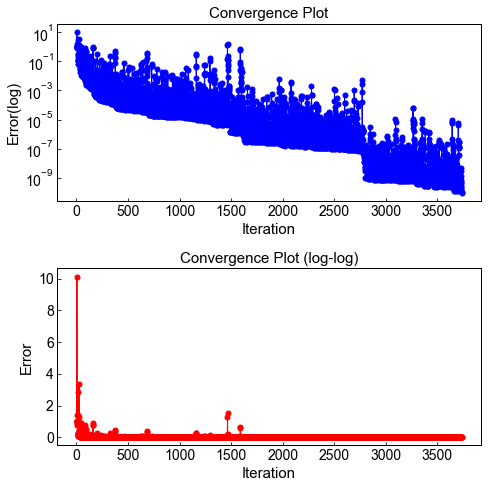

[Solution] CPU Time= 40423.65822649002 secs


In [73]:
Case1.solveFlow(max_iters=20000,tolerance=1e-10)

### Check mass balance error and write Paraview file

In [82]:
Q_in=0.0
Q_out=0.0
for BC in Inlets:
    fracID,BDID,BC_type,BC_val=BC
    Flux=Case1.FlowSolver.SubProblems[fracID].PostProcess.get_BDFlux(BDID)
    Q_in+=Flux
    print('[Inlet Flux] Frac %d Boundary ID %d Flux=%s [m^3]'%(fracID,BDID,Flux))
for BC in Outlets:
    fracID,BDID,BC_type,BC_val=BC
    Flux=Case1.FlowSolver.SubProblems[fracID].PostProcess.get_BDFlux(BDID)
    Q_out+=Flux
    print('[Outlet Flux] Frac %d Boundary ID %d Flux=%s [m^3]'%(fracID,BDID,Flux))

print('[Mass Balance] Q_in-Q_out=%.10lf%.10lf=%.10e'%(Q_in,Q_out,abs(Q_in+Q_out)))

[Inlet Flux] Frac 1 Boundary ID 74 Flux=0.002151523678737547 [m^3]
[Inlet Flux] Frac 2 Boundary ID 61 Flux=0.0025424439705280374 [m^3]
[Inlet Flux] Frac 3 Boundary ID 55 Flux=0.002223258552697421 [m^3]
[Inlet Flux] Frac 8 Boundary ID 14 Flux=0.002306734221456584 [m^3]
[Inlet Flux] Frac 30 Boundary ID 19 Flux=0.001808896308258829 [m^3]
[Inlet Flux] Frac 47 Boundary ID 8 Flux=0.0011294934136103993 [m^3]
[Inlet Flux] Frac 58 Boundary ID 13 Flux=0.0017724789731776952 [m^3]
[Inlet Flux] Frac 75 Boundary ID 16 Flux=0.0019773706330789083 [m^3]
[Outlet Flux] Frac 0 Boundary ID 62 Flux=-0.004041883244596779 [m^3]
[Outlet Flux] Frac 2 Boundary ID 62 Flux=-0.004177550773103319 [m^3]
[Outlet Flux] Frac 41 Boundary ID 15 Flux=-0.0037849495537744787 [m^3]
[Outlet Flux] Frac 46 Boundary ID 12 Flux=-0.003906530598836502 [m^3]
[Mass Balance] Q_in-Q_out=0.0159121998-0.0159109142=1.2855812343e-06


In [10]:
Mesh=Case1.writeSolution(mesh_input='..\Datas\DFN_400fracs.msh',fname='DFN_400fracs.vtp')
Mesh=Case1.writeDFN(fname='DFN_400fracs.vtp')

Pressure Range= 10000000.0 15000000.0
[Output] Saved VTK mesh and solution file Results\DFN_400fracs_solution.vtu) !
[Output] Saved Geometry VTK file Results\DFN_400fracs_DFN.vtp) !


In [10]:
Mesh=Case1.writeSolution(mesh_input='..\Datas\DFN_50fracs.msh',fname='DFN_50fracs.vtu')
Mesh=Case1.writeDFN(fname='DFN_50fracs.vtp')

Pressure Range= 1000000.0 2000000.0
[Output] Saved VTK mesh and solution file Results\DFN_50fracs_solution.vtu) !
[Output] Saved Geometry VTK file Results\DFN_50fracs_DFN.vtp) !


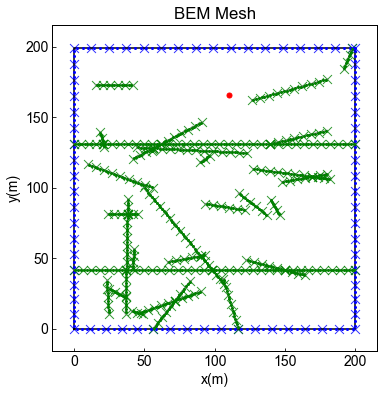

In [75]:
Case1.FlowSolver.SubProblems[0].plot_Mesh(Annotation=0,legend=0,node_size=2,scale=1.5,img_fname='Case4_BEM_Mesh.pdf')

[Visulization] Plotting Solution


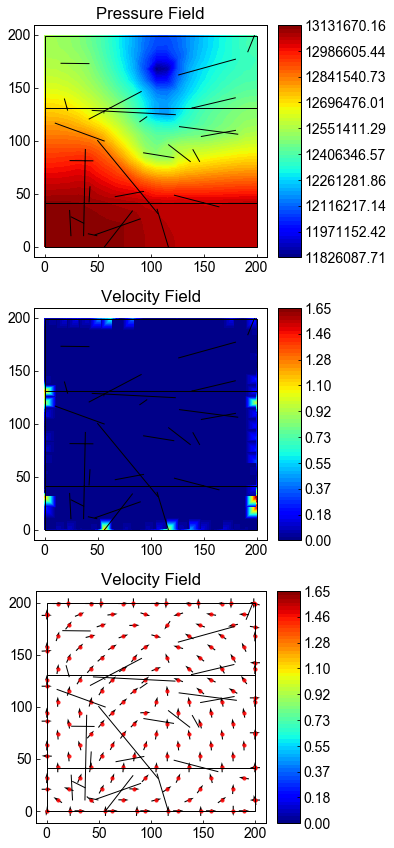

In [88]:
xx=Case1.FlowSolver.showSolution(0)

In [9]:
Case1.FlowSolver.SubProblems[0].get_Solution((4.23257950e+01,-1.77635684e-14))

(42.325795, -1.77635684e-14)
Checking... [0. 0.] [42.32579495  0.        ] 1.1270726555220778e-05 True
Checking... [42.32579495  0.        ] [38.3031806  54.12620744] 1.1270726555220778e-05 True
Checking... [38.3031806  54.12620744] [17.30861752 83.57990299] 1.1270726555220778e-05 False
Checking... [17.30861752 83.57990299] [-7.28787386 88.50487933] 1.1270726555220778e-05 False
Checking... [-7.28787386 88.50487933] [-9.33136561 88.91404942] 1.1270726555220778e-05 False
Checking... [-9.33136561 88.91404942] [-13.29867167  73.67944021] 1.1270726555220778e-05 False
Checking... [-13.29867167  73.67944021] [-23.79321613  33.37998229] 1.1270726555220778e-05 False
Checking... [-23.79321613  33.37998229] [0. 0.] 1.1270726555220778e-05 False
[1, 2]
Pts on the 1 Edge element


(0.0, -0.0, -0.0)

In [9]:
1791.4729203052057-1791.4729182283866

2.076819100693683e-06

In [72]:
Case1.FlowSolver.SubProblems[3].PostProcess.get_BDFlux(2)

(0.0, 0.0)


0.0

In [94]:
Case1.FlowSolver.SubProblems[1].get_Solution((0.5,0.2))

(1117647.0588054599, -3.891909727826714e-13, -0.17647058820819403)

In [95]:
Case1.FlowSolver.SubProblems[3].get_Solution((0.5,0.2))

(1117647.0588054836, 4.2908468458335844e-13, -0.1764705882081352)

In [96]:
-0.17647058820819403+-0.1764705882081352+0.3529411764944523

7.812306357379839e-11

In [82]:
Case1.FracNets.getFracsIntersectTable()

[[0, 1, 5, 5]]

In [83]:
Case1.FracNets.Get3DFracGeo(0)[1]

[array([0.228, 1.   , 1.14 ]), array([0.228, 0.072, 1.14 ])]

In [84]:
Case1.FracNets.Get3DFracGeo(1)[1]

[array([0.228, 1.   , 1.14 ]), array([0.228, 0.072, 1.14 ])]

In [69]:
np.dot([1,1,1],[2,2,2])

6